In [58]:
import numpy as np, pandas as pd, statsmodels as sm, seaborn as sms, matplotlib.pyplot as plt
from pandas import Series, DataFrame

In [59]:
sales_data_df = pd.read_csv("../data/sales_data_sample.csv", sep=",", encoding='Latin-1')

sales_data_df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [73]:
# Highest sales amount

all_order_quant = sales_data_df['QUANTITYORDERED']

max_quantity_index = np.argmax(all_order_quant.values)

max_quantity = all_order_quant[max_quantity_index]

max_quantity_date, max_quantity_time = sales_data_df.loc[max_quantity_index]['ORDERDATE'].split(' ')

max_quantity_fname, max_quantity_lname = sales_data_df.loc[max_quantity_index, ['CONTACTFIRSTNAME', 'CONTACTLASTNAME']].values

print(f"Highest sale quantity: {max_quantity}, occurs on {max_quantity_date} at {max_quantity_time} by {max_quantity_fname} {max_quantity_lname}")

Highest sale quantity: 97, occurs on 4/14/2005 at 0:00 by Frederique Citeaux


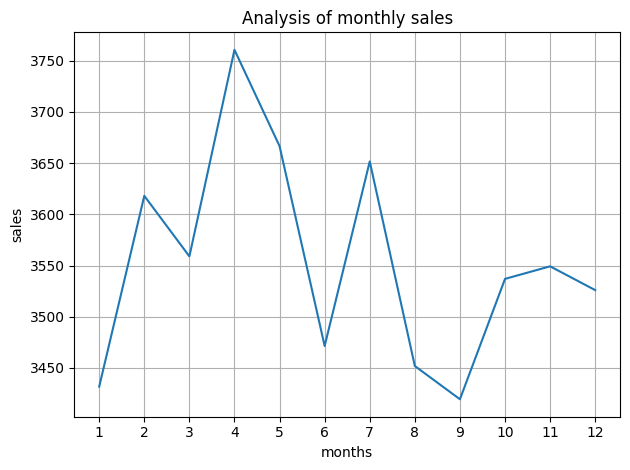

Two significant spikes in the average sales per month occurred. 

These included:
- April: Sales reached an all time high of 3760.62
- July: Sales reached a secondary peak of 3651.6

It's also important to note that a sharp decline is followed after both spikes.
- The sales declined from 3760.62 in April to 3471.43 in June, which is a difference of 289.2 sales
or a percentage difference of 7.69%
- The sales declined from 3651.6 in July to 3419.44 in September, which is a difference of 232.16 sales
or a percentage difference of 6.36%

The spikes can 


In [134]:
# Sales trend to analyse monthly sales

all_sales = sales_data_df[['SALES', 'MONTH_ID']].sort_values('MONTH_ID')

avg_monthly_sales = all_sales.groupby('MONTH_ID')['SALES'].mean()

months, sales = avg_monthly_sales.index, avg_monthly_sales.values

plt.plot(months, sales)
plt.xlabel('months')
plt.ylabel('sales')
plt.title('Analysis of monthly sales')
plt.grid(True)
plt.xticks(np.arange(min(months), max(months)+1, 1.0))
plt.tight_layout()
plt.show()

print(f"""Two significant spikes in the average sales per month occurred. 

These included:
- April: Sales reached an all time high of {np.round(sales[3], 2)}
- July: Sales reached a secondary peak of {np.round(sales[6], 2)}\n""")

def percentage_difference(month1, month2):
    return np.round(np.abs(month1-month2)/month1 * 100, 2)

def numerical_difference(month1, month2):
    return np.round(np.abs(month1-month2), 2)


print(f"""It's also important to note that a sharp decline is followed after both spikes.
- The sales declined from {np.round(sales[3], 2)} in April to {np.round(sales[5], 2)} in June, which is a difference of {numerical_difference(sales[3], sales[5])} sales
or a percentage difference of {percentage_difference(sales[3], sales[5])}%
- The sales declined from {np.round(sales[6], 2)} in July to {np.round(sales[8], 2)} in September, which is a difference of {numerical_difference(sales[6], sales[8])} sales
or a percentage difference of {percentage_difference(sales[6], sales[8])}%\n""")

print("""The spikes can be explained by... """)

